<a href="https://colab.research.google.com/github/Martyn0324/MRI-LGAN/blob/Prototypes/PreprocessingMRI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
from torchvision import transforms
from PIL import Image
import numpy as np
from zipfile import ZipFile as zf
import nibabel as nib
import matplotlib.pyplot as plt
from torchvision import models # For Fréchet Inception Distance --> The lower, the better

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
teste = zf("/content/drive/MyDrive/ATLAS-master/Lesion Tracing Training/1_control_subjects.zip", 'r')

In [ ]:
print(teste.printdir())

File Name                                             Modified             Size
1_control_subjects/                            2022-04-26 16:30:44            0
1_control_subjects/sub-r041s128_ses-1_T1w.nii.gz 2022-01-11 18:55:30     12181055
__MACOSX/1_control_subjects/._sub-r041s128_ses-1_T1w.nii.gz 2022-01-11 18:55:30          176
1_control_subjects/sub-r041s143_ses-1_T1w.nii.gz 2022-01-11 19:01:16     11495504
__MACOSX/1_control_subjects/._sub-r041s143_ses-1_T1w.nii.gz 2022-01-11 19:01:16          176
1_control_subjects/sub-r041s148_ses-1_T1w.nii.gz 2022-01-11 19:03:08     12405994
__MACOSX/1_control_subjects/._sub-r041s148_ses-1_T1w.nii.gz 2022-01-11 19:03:08          176
1_control_subjects/sub-r041s136_ses-1_T1w.nii.gz 2022-01-11 18:58:32     11830512
__MACOSX/1_control_subjects/._sub-r041s136_ses-1_T1w.nii.gz 2022-01-11 18:58:32          176
1_control_subjects/sub-r041s135_ses-1_T1w.nii.gz 2022-01-11 18:58:10     12236665
__MACOSX/1_control_subjects/._sub-r041s135_ses-1_T1w.nii.g

In [ ]:
teste.extractall()

In [ ]:
teste2 = nib.load("/content/1_control_subjects/sub-r041s128_ses-1_T1w.nii.gz")

In [ ]:
print(teste2)

<class 'nibabel.nifti1.Nifti1Image'>
data shape (160, 256, 256)
affine: 
[[ 9.97770667e-01 -4.54232842e-02  4.87368517e-02 -7.97438202e+01]
 [ 4.53688502e-02  9.98967826e-01  2.21606786e-03 -1.07748154e+02]
 [-4.87868339e-02  7.32341476e-09  9.98809218e-01 -1.50758286e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 16384
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 160 256 256   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int32
bitpix          : 32
slice_start     : 0
pixdim          : [1.        0.9999924 1.        1.        0.        0.        0.
 0.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_m

In [ ]:
teste3 = np.array(teste2.dataobj)

In [ ]:
print(teste3.shape)
print(teste3[100].shape)

(160, 256, 256)
(256, 256)


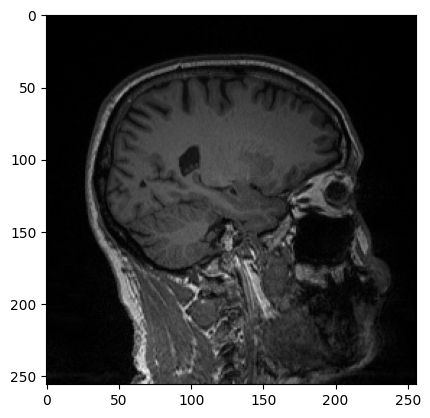

In [ ]:
plt.imshow(np.rot90(teste3[100]), cmap='gray')
plt.show()

In [ ]:
teste2 = nib.load("/content/1_control_subjects/sub-r041s128_ses-1_T1w.nii.gz")
teste3 = np.array(teste2.dataobj)

print(teste3.shape)

(160, 256, 256)


In [ ]:
teste4 = Image.fromarray(np.rot90(teste3[100]))
#teste4 = teste4.resize((128, 128))
teste4 = np.array(teste4)

print(teste4.shape)

(256, 256)


In [ ]:
print(teste4.dtype)
print(teste4.max(), teste4.min())

int32
1239 0


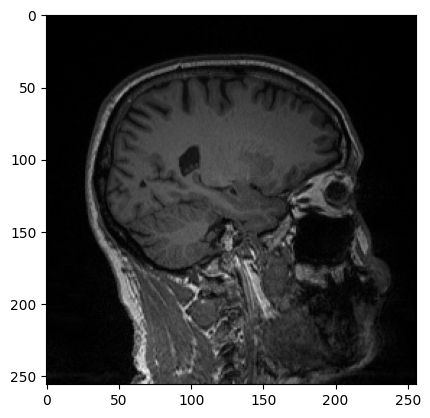

In [ ]:
plt.imshow(teste4, cmap='gray')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler, RobustScaler

In [ ]:
# https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#plot-all-scaling-minmax-scaler-section

mms = MinMaxScaler() # Compresses inliers to  really small range --> Generates many noises
norm = Normalizer()
ss = StandardScaler() # Compresses inliers to a really small range
rs = RobustScaler()

In [ ]:
test = mms.fit_transform(teste4)
test2 = norm.fit_transform(teste4)
test3 = ss.fit_transform(teste4)
test4 = rs.fit_transform(teste4)

In [ ]:
print(teste4.min(), teste4.max(), teste4.mean(), teste4.std())
#print(test.min(), test.max(), test.mean(), test.std())
print(test2.min(), test2.max(), test2.mean(), test2.std())
#print(test3.min(), test3.max(), test3.mean(), test3.std())
print(test4.min(), test4.max(), test4.mean(), test4.std())

0 1239 168.8827667236328 178.69730482056332
0.0 0.2923013622912653 0.04566525810507048 0.04249323961684724
-3.1273584905660377 20.419047619047618 0.18856501258385933 1.286375837963189


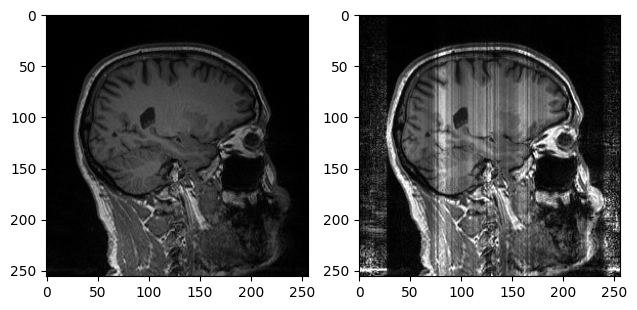

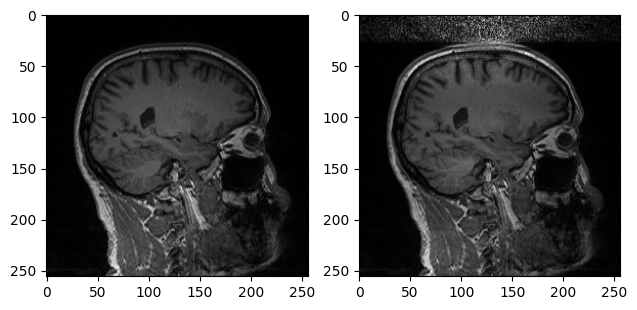

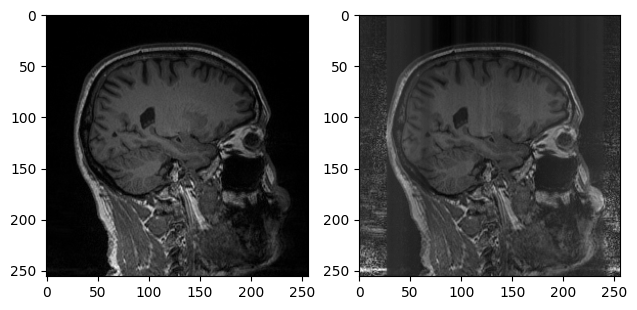

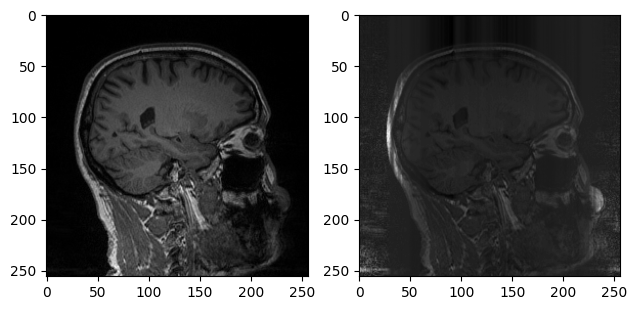

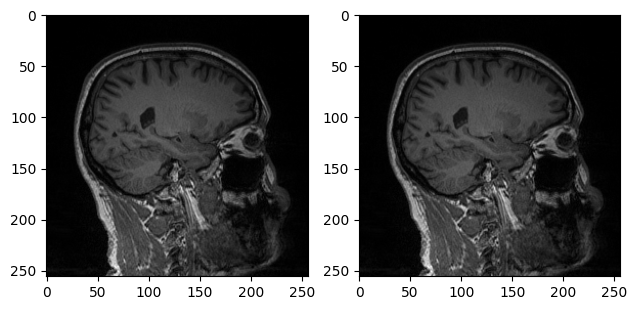

In [ ]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(teste4, cmap='gray')
ax[1].imshow(test, cmap='gray')
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 2)
ax[0].imshow(teste4, cmap='gray')
ax[1].imshow(test2, cmap='gray')
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 2)
ax[0].imshow(teste4, cmap='gray')
ax[1].imshow(test3, cmap='gray')
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 2)
ax[0].imshow(teste4, cmap='gray')
ax[1].imshow(test4, cmap='gray')
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 2)
ax[0].imshow(teste4, cmap='gray')
ax[1].imshow(test5, cmap='gray')
plt.tight_layout()
plt.show()

In [ ]:
test5 = (teste4 - teste4.mean())/(teste4.std())

print(test5.min(), test5.max(), test5.mean(), test5.std())

-0.945077302051166 5.988435216473534 -2.7755575615628914e-17 1.0


In [ ]:
teste2 = nib.load("/content/1_control_subjects/sub-r041s128_ses-1_T1w.nii.gz")
teste3 = np.array(teste2.dataobj)

In [ ]:
chunkA = []

for i in range(len(teste3)):

    image = np.rot90(teste3[i]).astype(np.float32)
    image = (image - image.mean())/(image.std() + 1e-7)
    image = torch.from_numpy(image).unsqueeze(0).unsqueeze(0)
    chunkA.append(image)

chunkA = torch.cat(chunkA, 1)

print(chunkA.size())

In [ ]:
chunkA = torch.cat(chunkA, 1)

print(chunkA.size())

torch.Size([1, 160, 256, 256])


In [ ]:
teste2 = nib.load("/content/1_control_subjects/sub-r041s148_ses-1_T1w.nii.gz")
teste3 = np.array(teste2.dataobj)

In [ ]:
chunkB = []

for i in range(len(teste3)):

    image = np.rot90(teste3[i]).astype(np.float32)
    image = (image - image.mean())/(image.std() + 1e-7)
    image = torch.from_numpy(image).unsqueeze(0).unsqueeze(0)
    chunkB.append(image)

chunkB = torch.cat(chunkB, 1)

print(chunkB.size())

torch.Size([1, 160, 256, 256])


In [ ]:
dataset = torch.cat((chunkA, chunkB), 0)

print(dataset.size())

torch.Size([2, 160, 256, 256])


In [ ]:
dataset = torch.cat((dataset, chunkB), 0)

print(dataset.size())

torch.Size([5, 160, 256, 256])


In [ ]:
for i in range(len(teste3)):

    image = np.rot90(teste3[i]).astype(np.float32)
    image = (image - image.mean())/(image.std() + 1e-7)
    image = torch.from_numpy(image).unsqueeze(0).unsqueeze(0)
    dataset.append(image)

In [ ]:
print(len(dataset))
print(dataset[0].size())

800
torch.Size([1, 256, 256])


In [ ]:
control_dataset = dataset

print(control_dataset.size())
print(control_dataset.min(), control_dataset.max(), control_dataset.mean(), control_dataset.std())

torch.Size([5, 160, 256, 256])
tensor(-1.0582) tensor(9.3953) tensor(3.9116e-10) tensor(1.)


In [ ]:
torch.save(control_dataset, "/content/drive/MyDrive/ATLAS-master/Processed_Control")

In [ ]:
teste = zf("/content/drive/MyDrive/ATLAS-master/Lesion Tracing Training/1_training_lesions_set1.zip", 'r')

In [ ]:
teste.extractall()

In [ ]:
teste2 = nib.load("/content/1_training_lesions_set1/sub-r000s001/sub-r000s001_T1.nii.gz")
teste3 = np.array(teste2.dataobj)

In [ ]:
print(teste3.shape)

(255, 208, 200)


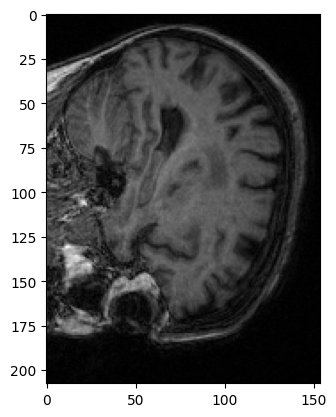

In [ ]:
plt.imshow(teste3[100], cmap='gray')
plt.show()

In [ ]:
teste2 = nib.load("/content/1_training_lesions_set1/sub-r000s001/sub-r000s001_desc-T1-lesion_mask.nii.gz")
teste3 = np.array(teste2.dataobj)

In [ ]:
print(teste2)

<class 'nibabel.nifti1.Nifti1Image'>
data shape (254, 208, 154)
affine: 
[[   1.            0.            0.         -129.42373657]
 [   0.            1.            0.         -108.21913147]
 [   0.            0.            1.          -67.32203674]
 [   0.            0.            0.            1.        ]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 254 208 154   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint16
bitpix          : 16
slice_start     : 0
pixdim          : [1. 1. 1. 1. 0. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glm

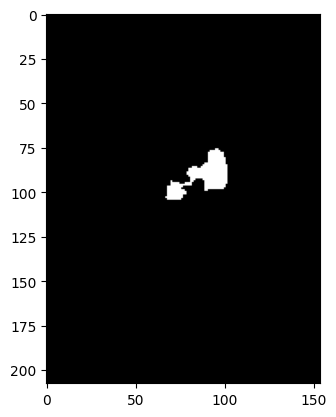

In [ ]:
plt.imshow(teste3[100], cmap='gray')
plt.show()

In [ ]:
teste2 = nib.load("/content/1_training_lesions_set1/sub-r000s001/sub-r000s001_T1.nii.gz")
teste3 = np.array(teste2.dataobj)

In [ ]:
dataset2 = []

for i in range(len(teste3)):

    image = np.rot90(teste3[i]).astype(np.float32)
    image = (image - image.mean())/(image.std() + 1e-7)
    image = torch.from_numpy(image).unsqueeze(0)
    dataset.append(image)
    dataset2.append(image)

In [ ]:
teste2 = nib.load("/content/1_training_lesions_set1/sub-r000s005/sub-r000s005_T1.nii.gz")
teste3 = np.array(teste2.dataobj)

In [ ]:
for i in range(len(teste3)):

    image = np.rot90(teste3[i]).astype(np.float32)
    image = (image - image.mean())/(image.std() + 1e-7)
    image = torch.from_numpy(image).unsqueeze(0)
    dataset.append(image)
    dataset2.append(image)

In [ ]:
dataset2 = torch.cat(dataset2, 0)

print(dataset2.size())
print(dataset2.min(), dataset2.max(), dataset2.mean(), dataset2.std())

RuntimeError: Sizes of tensors must match except in dimension 0. Expected size 154 but got size 200 for tensor number 254 in the list.

In [ ]:
torch.save(dataset, "/content/drive/MyDrive/ATLAS-master/Processed_Control")